In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

In [6]:
# Read the CSV file
df = pd.read_csv('../../data/row/02_brad_balanced.csv')
# Initialize dictionary to store results
results = {}

In [7]:
# 1. Dataset shape
results['shape'] = df.shape
print("Dataset shape:", df.shape)

Dataset shape: (156506, 6)


In [8]:
# 2. First few rows
results['head'] = df.head().to_dict()
print("\nFirst few rows:")
print(df.head())


First few rows:
   Unnamed: 0  rating   review_id   book_id   user_id  \
0           0     2.0  1665743403  21435637  13637412   
1           1     2.0  1664872313  20015365  13637412   
2           2     2.0  1659286461  56517018  13637412   
3           3     2.0  1657686339  22103652  13637412   
4           4     2.0  1657401919  56445490  13637412   

                                              review  
0  قرأتها من فترة طويلة و لا يحضرني فيها الا اعجا...  
1  كان نفسي احب الرواية دي، أغلب اصدقائي اللي قرأ...  
2  عملوا منها مسلسل. اجوف المسلسل ولا اقرى الرواي...  
3      لطيفه :). كأنك بتتفرج ع مسلسل بس نوعا ما لطيف  
4  الرواية جميلة تحمل معاني ورسالات كثيرة اراد ال...  


In [9]:
# 3. Data types
results['dtypes'] = df.dtypes.to_dict()
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0      int64
rating        float64
review_id       int64
book_id         int64
user_id         int64
review         object
dtype: object


In [10]:
# 4. Missing values
results['missing_values'] = df.isnull().sum().to_dict()
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0    0
rating        0
review_id     0
book_id       0
user_id       0
review        0
dtype: int64


In [11]:
# 5. Summary statistics
results['describe'] = df.describe(include='all').to_dict()
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
           Unnamed: 0         rating     review_id       book_id  \
count   156506.000000  156506.000000  1.565060e+05  1.565060e+05   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean     78252.500000       3.055602  8.914773e+08  1.641808e+07   
std      45179.534952       1.538350  4.231190e+08  1.200774e+07   
min          0.000000       1.000000  6.252853e+06  8.324000e+03   
25%      39126.250000       2.000000  5.559988e+08  6.532272e+06   
50%      78252.500000       2.000000  8.877922e+08  1.338756e+07   
75%     117378.750000       5.000000  1.230548e+09  2.335877e+07   
max     156505.000000       5.000000  1.683834e+09  5.723482e+07   

             user_id  review  
count   1.565060e+05  156506  
unique           NaN  154976  
top              NaN       #  
freq             NaN     119  
mean   

In [12]:
# 6. Rating distribution
results['rating_distribution'] = df['rating'].value_counts().to_dict()
print("\nRating distribution:")
print(df['rating'].value_counts())


Rating distribution:
rating
2.0    47133
5.0    40203
4.0    37923
1.0    31247
Name: count, dtype: int64


In [13]:
# 7. Review length
df['review_length'] = df['review'].astype(str).apply(len)
results['review_length_stats'] = df['review_length'].describe().to_dict()
print("\nReview length statistics:")
print(df['review_length'].describe())


Review length statistics:
count    156506.000000
mean        399.134774
std         683.268106
min           1.000000
25%          82.000000
50%         199.000000
75%         447.000000
max       19967.000000
Name: review_length, dtype: float64


In [14]:
# 8. Word count in reviews
df['word_count'] = df['review'].astype(str).apply(lambda x: len(re.findall(r'\w+', x)))
results['word_count_stats'] = df['word_count'].describe().to_dict()
print("\nWord count statistics:")
print(df['word_count'].describe())


Word count statistics:
count    156506.000000
mean         72.417677
std         123.199705
min           0.000000
25%          15.000000
50%          36.000000
75%          81.000000
max        3867.000000
Name: word_count, dtype: float64


In [15]:
# 9. Unique values in columns
results['unique_values'] = {
    'review_id': df['review_id'].nunique(),
    'book_id': df['book_id'].nunique(),
    'user_id': df['user_id'].nunique()
}
print("\nUnique values:")
print(f"Review IDs: {df['review_id'].nunique()}")
print(f"Book IDs: {df['book_id'].nunique()}")
print(f"User IDs: {df['user_id'].nunique()}")


Unique values:
Review IDs: 156506
Book IDs: 44490
User IDs: 4958


In [16]:
# 10. Most frequent words in reviews
all_words = ' '.join(df['review'].astype(str)).split()
word_freq = Counter(all_words)
results['most_frequent_words'] = dict(word_freq.most_common(10))
print("\nMost frequent words:")
print(word_freq.most_common(10))


Most frequent words:
[('من', 268114), ('في', 238855), ('و', 220757), ('.', 191733), ('على', 101783), ('،', 98277), ('لا', 92673), ('أن', 90789), ('ما', 83681), ('عن', 83509)]


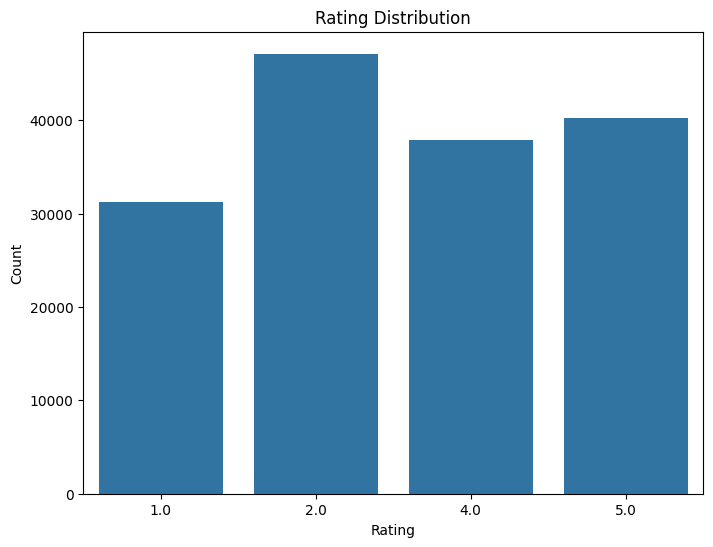

In [17]:
# 11. Plot rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
plt.close()

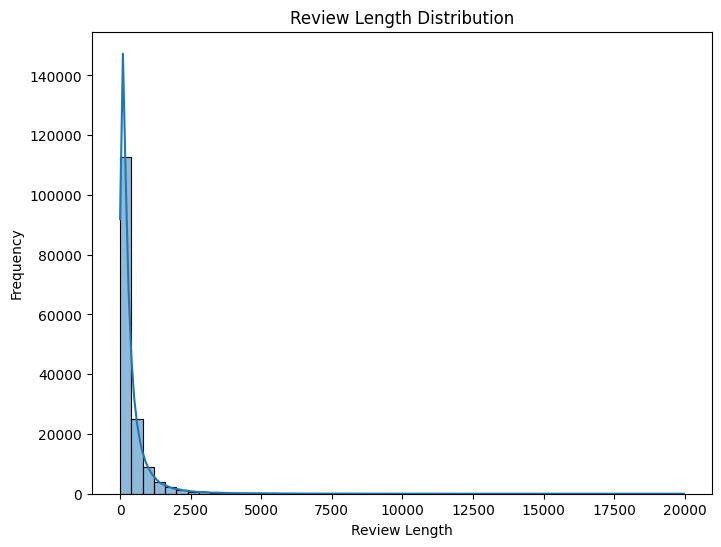

In [18]:
# 12. Plot review length distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()
plt.close()

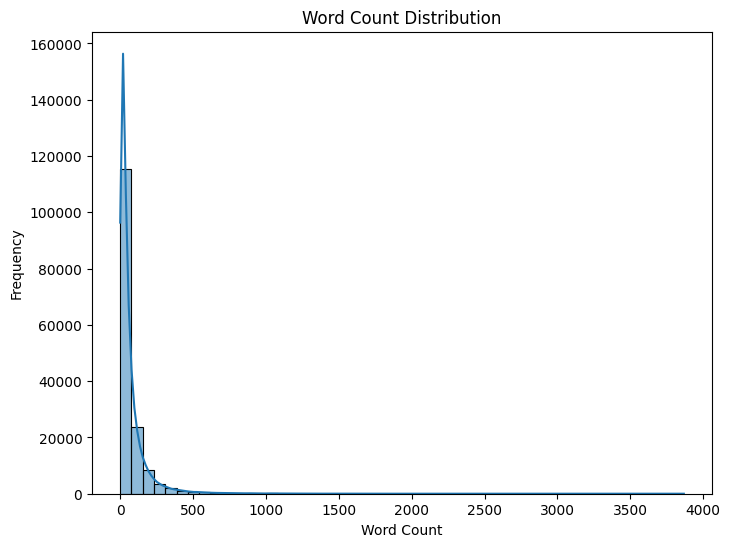

In [19]:
# 13. Plot word count distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()
plt.close()

In [20]:
# 14. Save results to a .txt file
with open('data_exploration_results.txt', 'w') as f:
    for key, value in results.items():
        f.write(f"{key}: {value}\n")

print("\nAll results saved to 'data_exploration_results.txt'")


All results saved to 'data_exploration_results.txt'
